In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# For Visualization of Tree
import graphviz
from sklearn.tree import export_graphviz

from matplotlib import pyplot as plt

#### 1. Basic Decision Tree Regressor Sample

In [25]:
# A simple example
from sklearn import tree
X = [[0,0,1],[2,2,3],[3,3,4],[4,4,5],[5,5,6],[6,6,7],[7,7,8],[8,8,9],[9,9,10],[10,10,11]]
y = [0.3,2.3,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test, y_test)

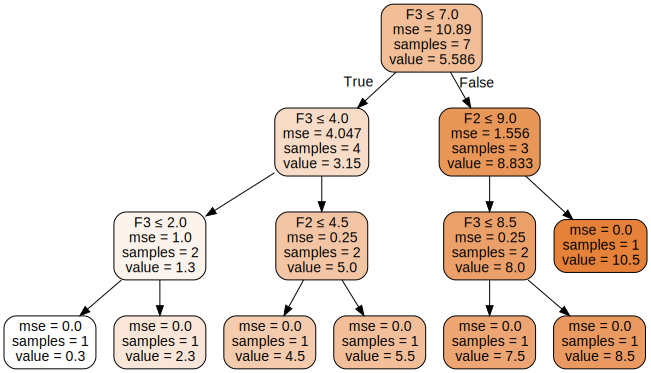

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["F1","F2","F3"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 2. Minimum Cost Complexity Pruning

In [18]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [19]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
df = pd.DataFrame(np.array([ccp_alphas, impurities]).T, columns=["CCP_Alpha","Impurity"])
df

,CCP_Alpha,Impurity
0,0.000000,0.000000
1,0.002266,0.004533
2,0.004647,0.018475
3,0.004660,0.023135
4,0.005634,0.028769
5,0.007042,0.035811
6,0.007842,0.043653
7,0.009114,0.052767
8,0.011444,0.064211
9,0.018988,0.083199


#### Plot Impurity vs Effective Alpha

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

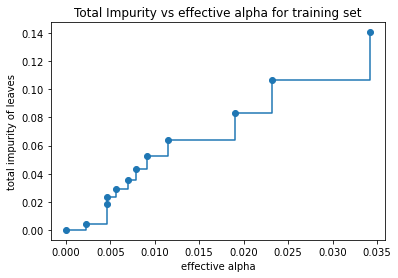

In [20]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
#ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


#### Train Decision tree with various CCP Alphas
Let's train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03422474765119576


#### Now, let's plot CCP_Alphas vs Node Count and Tree Depth
We removed the last element in clfs and ccp_alphas, because it is the minimal tree with only one node.

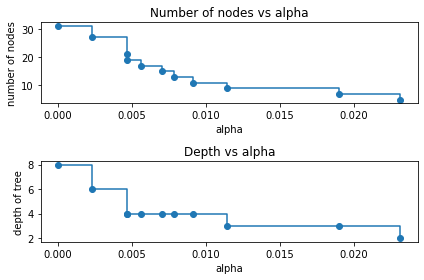

In [23]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


#### Accuracy vs Alpha for Training and Testing Data sets
When ccp_alpha is set to zero, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. 

In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

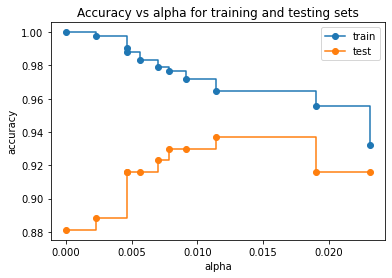

In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
